# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of project_grade_category

In [7]:
prj_grade_cat = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prj_grade_cat_list = []
for i in prj_grade_cat:
    for j in i.split(' '): # it will split by space
        j=j.replace('Grades','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    prj_grade_cat_list.append(j.strip())

project_data['clean_grade'] = prj_grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grade'].values:
    my_counter.update(word.split())
    
prj_grade_cat_dict = dict(my_counter)
sorted_prj_grade_cat_dict = dict(sorted(prj_grade_cat_dict.items(), key=lambda kv: kv[1]))

project_data['clean_grade'].values

array(['PreK-2', '6-8', '6-8', ..., 'PreK-2', '3-5', '6-8'], dtype=object)

## 1.5 preprocessing of teacher_prefix

In [8]:
#tea_pfx_cat = list(project_data['teacher_prefix'].values)
tea_pfx_cat = list(project_data['teacher_prefix'].astype(str).values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

##https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
#vectorizer.fit(project_data['teacher_prefix'].astype(str).values)

tea_pfx_cat_list = []
for i in tea_pfx_cat:
    #for j in i.split(' '): # it will split by space
    #j=j.replace('.','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    i=i.replace('.','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    i=i.replace('nan','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    tea_pfx_cat_list.append(i.strip())

project_data['clean_tea_pfx'] = tea_pfx_cat_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_tea_pfx'].values:
    my_counter.update(word.split())
    
tea_pfx_cat_dict = dict(my_counter)
sorted_tea_pfx_cat_dict = dict(sorted(tea_pfx_cat_dict.items(), key=lambda kv: kv[1]))

project_data['clean_tea_pfx'].values

array(['Mrs', 'Mr', 'Ms', ..., 'Mrs', 'Mrs', 'Ms'], dtype=object)

## 1.6 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_grade  \
0             Literacy_Language                  ESL Literacy      PreK-2   
1  History_Civics Health_Sports  Civics_Government TeamSports         6-8   

  clean_tea_pfx                                              essay  
0           Mrs  My students are English learners that are work...  
1            Mr  Our students arrive to our school eager to lea...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:48<00:00, 1002.33it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_grade  \
0             Literacy_Language                  ESL Literacy      PreK-2   
1  History_Civics Health_Sports  Civics_Government TeamSports         6-8   

  clean_tea_pfx                                              essay  
0           Mrs  My students are English learners that are work...  
1            Mr  Our students arrive to our school eager to lea...

In [21]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [22]:
sent_title = decontracted(project_data['project_title'].values[20000])
print(sent_title)
print("="*50)

We Need To Move It While We Input It!


In [23]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_title = sent_title.replace('\\r', ' ')
sent_title = sent_title.replace('\\"', ' ')
sent_title = sent_title.replace('\\n', ' ')
print(sent_title)

We Need To Move It While We Input It!


In [24]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
print(sent_title)

We Need To Move It While We Input It 


In [25]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_title.append(sent_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 23003.85it/s]


In [26]:
# after preprocesing
preprocessed_title[10]

'reading changes lives'

In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_prj_sum = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_prj_sum.append(sent_title.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:11<00:00, 9473.09it/s]


## 1.9 Preparing data for models

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.3 Vectorizing Numerical features

In [29]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [31]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

In [32]:
##taking 50K datapoint
#project_data50K=project_data[:50000]
project_data20K=project_data[:20000]
#project_data100K=project_data[:100000]
X=project_data20K
#X=project_data50K
#X=project_data100K
print(project_data20K.shape)
#print(project_data50K.shape)
#print(project_data100K.shape)
print(X.shape)

(20000, 20)
(20000, 20)


In [33]:
# makins Xi as 19 column matrix, where we create the modle and Yi as single colum matrix as a class label.
y = project_data20K['project_is_approved'].values
#y = project_data50K['project_is_approved'].values
#project_data50K.drop(['project_is_approved'], axis=1, inplace=True)
#rint(y.shape)
#(project_data50K.head(1)
print(project_data20K.columns)
#print(project_data50K.columns)
y20K=y[:20000]
#y50K=y[:50000]
y=y20K
#y=y50K

#y = project_data['project_is_approved'].values
#project_data.drop(['project_is_approved'], axis=1, inplace=True)
##print(y.shape)
#project_data.head(1)
#
#y100K=y[:100000]
#y=y100K

#y = project_data['project_is_approved'].values
#project_data.drop(['project_is_approved'], axis=1, inplace=True)
#print(y.shape)
#project_data.head(1)

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay', 'price', 'quantity'],
      dtype='object')


In [34]:
print(X.shape)
print(y.shape)

(20000, 20)
(20000,)


<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [35]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [36]:
print(X.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay', 'price', 'quantity'],
      dtype='object')


## 2.1.1 Make Data Model Ready: encoding school_state categorical data

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_state_ohe = vectorizer.transform(X['school_state'].values)

print("school_state After vectorizations")
print(X_state_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

school_state After vectorizations
(20000, 51) (20000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.1.2 Make Data Model Ready: encoding clean_categories

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer = CountVectorizer(vocabulary =list(sorted_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_clean_ohe = vectorizer.transform(X['clean_categories'].values)

print("clean_categories After vectorizations")
print(X_clean_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_categories After vectorizations
(20000, 9) (20000,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


### 2.1.3 Make Data Model Ready: encoding clean_subcategories

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_sub_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_cleanSub_ohe = vectorizer.transform(X['clean_subcategories'].values)

print("clean_subcategories After vectorizations")
print(X_cleanSub_ohe.shape, y.shape)
#print(vectorizer.get_feature_names())
print("="*100)

clean_subcategories After vectorizations
(20000, 30) (20000,)


### 2.1.4 Make Data Model Ready: encoding project_grade_category

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_prj_grade_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_grade_ohe = vectorizer.transform(X['clean_grade'].values)

print("project_grade_category After vectorizations")
print(X_grade_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

project_grade_category After vectorizations
(20000, 4) (20000,)
['9-12', '6-8', '3-5', 'PreK-2']


### 2.1.5 Make Data Model Ready: encoding teacher_prefix

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_tea_pfx_cat_dict.keys()),lowercase =False,binary=True)
#https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
vectorizer.fit(X['clean_tea_pfx'].astype(str).values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_teacher_ohe = vectorizer.transform(X['clean_tea_pfx'].astype(str).values)

print("teacher_prefix After vectorizations")
print(X_teacher_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix After vectorizations
(20000, 5) (20000,)
['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


### 2.1.6 Make Data Model Ready: encoding project_resource_summary

In [44]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_prjResSum_ohe = vectorizer.transform(X['project_resource_summary'].values)

print("project_resource_summary After vectorizations")
print(X_prjResSum_ohe.shape, y.shape)
#print(vectorizer.get_feature_names())
print("="*100)

project_resource_summary After vectorizations
(20000, 6925) (20000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 2.2.1 Make Data Model Ready: encoding numerical | quantity

In [46]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['quantity'].values.reshape(-1,1))

X_quantity_norm = normalizer.transform(X['quantity'].values.reshape(-1,1))

print("quantity After vectorizations")
print(X_quantity_norm.shape, y.shape)
print("="*100)

quantity After vectorizations
(20000, 1) (20000,)


## 2.2.2 Make Data Model Ready: encoding numerical| teacher_number_of_previously_posted_projects

In [47]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_TprevPrj_norm = normalizer.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("teacher_number_of_previously_posted_projects After vectorizations")
print(X_TprevPrj_norm.shape, y.shape)
print("="*100)

teacher_number_of_previously_posted_projects After vectorizations
(20000, 1) (20000,)


## 2.2.3 Make Data Model Ready: encoding numerical | price

In [48]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['price'].values.reshape(-1,1))

X_price_norm = normalizer.transform(X['price'].values.reshape(-1,1))

print("Price After vectorizations")
print(X_price_norm.shape, y.shape)
print("="*100)

Price After vectorizations
(20000, 1) (20000,)


In [49]:
h=['price','quantity','teacher_number_of_previously_posted_projects']
print(type(h))

<class 'list'>


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 2.3.1 Make Data Model Ready: project_essay | BOW

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (BOW with bi-grams with min_df=10 and max_features=5000)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_essay_bow = vectorizer.transform(X['essay'].values)

print("Essay After vectorizations")
print(X_essay_bow.shape, y.shape)
print("="*100)
g=vectorizer.get_feature_names()

Essay After vectorizations
(20000, 5000) (20000,)


## 2.3.2 Make Data Model Ready: project_title | BOW

In [51]:
vectorizer = CountVectorizer()
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (BOW with bi-grams with min_df=10 and max_features=5000)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_title_bow = vectorizer.transform(X['project_title'].values)

print("project_title After vectorizations")
print(X_title_bow.shape, y.shape)
#print(vectorizer.get_feature_names())
print("="*100)
k=vectorizer.get_feature_names()

project_title After vectorizations
(20000, 2089) (20000,)


In [52]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_essay_bow, X_title_bow, X_state_ohe, X_clean_ohe, X_cleanSub_ohe, X_grade_ohe, X_teacher_ohe, X_prjResSum_ohe, X_quantity_norm, X_TprevPrj_norm, X_price_norm)).tocsr()

print("Final Data matrix | BOW")
print(X_tr_bow.shape, y.shape)
print("="*100)

Final Data matrix | BOW
(20000, 14116) (20000,)


In [53]:
best_tuned_parameters = [{'C': [0.01]}]

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.8227


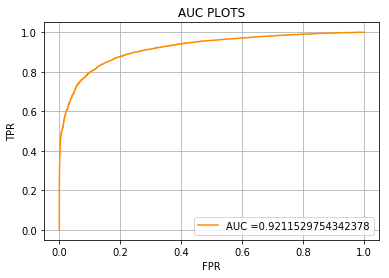

In [59]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = GridSearchCV(LogisticRegression(class_weight="balanced"), best_tuned_parameters)
model.fit(X_tr_bow, y)
#model.fit(X_tr_bow)

#y_bow_pred = model.predict_proba(X_tr_bow)[:,1]
x_bow_pred = model.predict_proba(X_tr_bow)[:,1]

print(model.best_estimator_)
print(model.score(X_tr_bow, y))
#print(model.score(X_tr_bow))

X_fpr, X_tpr, X_thresholds = roc_curve(y, y_bow_pred)

plt.plot(X_fpr, X_tpr, label="AUC ="+str(auc(X_fpr, X_tpr)),color='darkorange')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS")
plt.grid(True)
plt.show()

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [267]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X_tr_bow.shape)

bow_Feature= SelectKBest(chi2,k=5000)
X_tr_bow_5K=bow_Feature.fit_transform(X_tr_bow,y)

print("Final Data matrix ")
print(X_tr_bow_5K.shape, y.shape)

(20000, 14116)
Final Data matrix 
(20000, 5000) (20000,)


<h2>2.5 Apply Kmeans</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [268]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://stackoverflow.com/questions/51514158/how-to-run-gridsearchcv-for-k-means-using-spark-sklearn

from sklearn.cluster import KMeans
import numpy as np

k=[3,5,7,9,11,13,15,19,27,33]
inertList=[]

for i in k:
    kmeans=KMeans(n_clusters=i,n_init =10).fit(X_tr_bow_5K)
    inertList.append(kmeans.inertia_)
print(k)
print(inertList)

[3, 5, 7, 9, 11, 13, 15, 19, 27, 33]
[6702130.853643525, 6500398.249518574, 6373875.096416284, 6283008.331486244, 6216142.207386503, 6166273.4483066145, 6124907.112133581, 6047497.883974317, 5938016.168225641, 5877028.967765003]


No handles with labels found to put in legend.


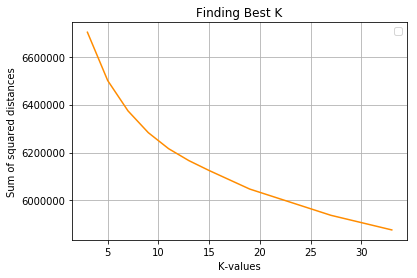

In [269]:
plt.plot(k, inertList,color='darkorange')
plt.legend()
plt.xlabel("K-values")
plt.ylabel("Sum of squared distances")
plt.title("Finding Best K")
plt.grid(True)
plt.show()

## Best K is 10

In [389]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://stackoverflow.com/questions/51514158/how-to-run-gridsearchcv-for-k-means-using-spark-sklearn

from sklearn.cluster import KMeans
import numpy as np

inertList=[]

kmeans=KMeans(n_clusters=10,n_init =10).fit(X_tr_bow_5K)
inertList.append(kmeans.inertia_)

print(k)
print(inertList)

[3, 5, 7, 9, 11, 13, 15, 19, 27, 33]
[6248508.940029501]


In [390]:
#kmeans.cluster_centers_
#kmeansns.inertia_
KmLabel=kmeans.labels_
np.unique(KmLabel)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [391]:
X_working_kmean = X.copy(deep=True)
X_working_kmean["KmLabel"]=KmLabel
X_working_kmean.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay', 'price', 'quantity', 'KmLabel'],
      dtype='object')

## step 4: Summarize each cluster by manually observing few points from each cluster.

In [392]:
X_working_Kmean_clus0=X_working_kmean[X_working_kmean.KmLabel==0]
print(X_working_Kmean_clus0.head(3))

X_working_Kmean_clus7=X_working_kmean[X_working_kmean.KmLabel==7]
print(X_working_Kmean_clus7.head(3))

    Unnamed: 0       id                        teacher_id school_state  \
3           45  p246581  f3cb9bffbba169bef1a77b243e620b60           KY   
16      127215  p174627  4ad7e280fddff889e1355cc9f29c3b89           FL   
24       21478  p126524  74f8690562c44fc88f65f845b9fe61d0           FL   

   project_submitted_datetime  \
3         2016-10-06 21:16:17   
16        2017-01-18 10:59:05   
24        2017-03-31 12:34:44   

                                        project_title  \
3                              Techie Kindergarteners   
16                 Making Great LEAP's With Leapfrog!   
24  S.T.E.A.M. Challenges(Science Technology Engin...   

                                      project_essay_1  \
3   I work at a unique school filled with both ESL...   
16  My Preschool children, ages 3-5 years old with...   
24  This year, I am teaching in an EFL (Extended F...   

                                      project_essay_2 project_essay_3  \
3   My students live in high poverty co

## step 5: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in step 3.

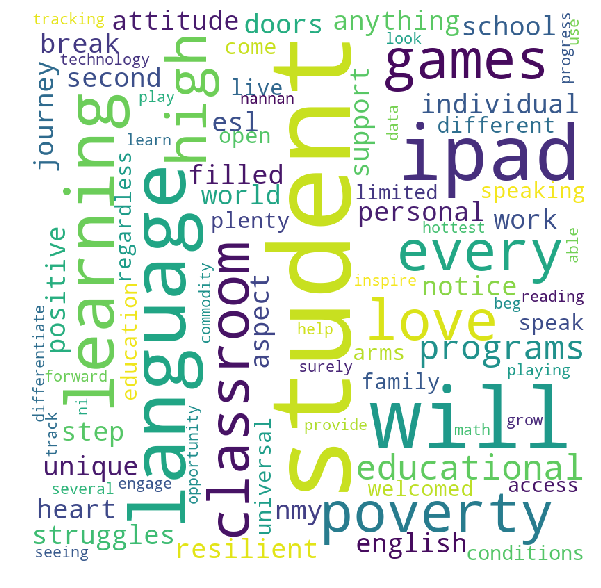

In [393]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in X_working_Kmean_clus0["essay"][:1]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<h2>2.6 Apply AgglomerativeClustering</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X_tr_bow.shape)

bow_Feature= SelectKBest(chi2,k=2000)
X_tr_bow_2K=bow_Feature.fit_transform(X_tr_bow,y)

print("Final Data matrix ")
print(X_tr_bow_2K.shape, y.shape)

(20000, 14116)
Final Data matrix 
(20000, 2000) (20000,)


In [113]:
# TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
X_tr_bow_2K=X_tr_bow_2K.toarray()

In [98]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

from sklearn.cluster import AgglomerativeClustering
import numpy as np

noOfCluster = [2, 5]
labelList=[]

for i in noOfCluster:
    clusterAgg =AgglomerativeClustering(n_clusters=i)
    clusterAgg.fit(X_tr_bow_2K)
    labelList.append(clusterAgg.labels_)
    
print(noOfCluster)
print(labelList)


#https://stackoverflow.com/questions/34611038/grid-search-for-hyperparameter-evaluation-of-clustering-in-scikit-learn

[2, 5]
[array([1, 0, 0, ..., 1, 1, 0], dtype=int64), array([1, 0, 2, ..., 1, 1, 4], dtype=int64)]


In [379]:

print(labelList)
labelList0=labelList[0]

# ValueError: Length of values does not match length of index
# so taking label for first columns
print(labelList0)
AggLabel=labelList0
np.unique(AggLabel)

[array([1, 0, 0, ..., 1, 1, 0], dtype=int64), array([1, 0, 2, ..., 1, 1, 4], dtype=int64)]
[1 0 0 ... 1 1 0]


array([0, 1], dtype=int64)

In [380]:
X_working_agg = X.copy(deep=True)
X_working_agg["AggLabel"]=AggLabel
X_working_agg.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay', 'price', 'quantity', 'AggLabel'],
      dtype='object')

## step 4: Summarize each cluster by manually observing few points from each cluster.

In [381]:
X_working_agg_clus0=X_working_agg[X_working_agg.AggLabel==0]
print(X_working_agg_clus0.head(3))

X_working_agg_clus1=X_working_agg[X_working_agg.AggLabel==1]
print(X_working_agg_clus1.head(3))

   Unnamed: 0       id                        teacher_id school_state  \
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0           AZ   
5      141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           FL   

  project_submitted_datetime  \
1        2016-10-25 09:22:10   
2        2016-08-31 12:03:56   
5        2017-04-08 22:40:43   

                                       project_title  \
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
5  Flexible Seating for Mrs. Jarvis' Terrific Thi...   

                                     project_essay_1  \
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
5  I will be moving from 2nd grade to 3rd grade a...   

                                     project_essay_2 project_essay_3  \
1  The projector we need for our school is very c...    

## step 5: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in step 3.

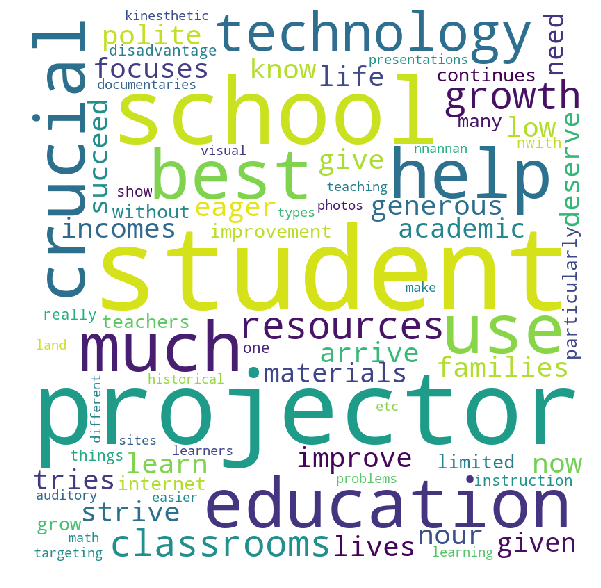

In [382]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in X_working_agg_clus0["essay"][:1]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<h2>2.7 Apply DBSCAN</h2>

1. For each point, in dataset, find the kth neighbour distance.

2. 
Put distance and indexes in a dictionary as key value pairs and then sort the dictionary according to the keys? And plot the final result ?" 
For example:
x1 20
x2 15
x3 18
x4 9
So after sorting in increasing order = > x4 9; x2 15; x3 18; x1 20

3. Draw the polt with K and distance

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X_tr_bow.shape)

bow_Feature= SelectKBest(chi2,k=50)
X_tr_bow_50=bow_Feature.fit_transform(X_tr_bow,y)

print("Final Data matrix ")
print(X_tr_bow_50.shape, y.shape)

(20000, 14116)
Final Data matrix 
(20000, 50) (20000,)


In [121]:
X_tr_bow_1000_50=X_tr_bow_50[:1000]

In [282]:
#print(X_tr_bow_1000_50[1].shape)
#print(X_tr_bow_1000_50[1])
print(type(X_tr_bow_50))
X_tr_bow_1000_50=X_tr_bow_50[:1000]
print(type(X_tr_bow_1000_50))
print(type(X_tr_bow_1000_50[1]))
#print(X_tr_bow_1000_50.todense())
print(type(X_tr_bow_2K))


<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [273]:
import operator 
def getNeighbors(trainingSet, pivotInstance, k):
    distances = []
    #print(pivotInstance)
    #pivotInstance=pivotInstance.todense()
    #trainingSet=trainingSet.todense()
    for x in range(trainingSet.shape[0]):
        dist = euclideanDistance(pivotInstance, trainingSet[x])
        distances.append(dist)
    # sorrting the distances.
    distances.sort()
    neighbors = []
    # takes points, which are near neighbour
    neighbors=distances[k]
    return neighbors

In [274]:
# https://www.edureka.co/community/18851/plot-a-k-distance-graph-in-python

# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/#
import math
def euclideanDistance(instance1, instance2):
    # how to find euclidean distance in python
    
    # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
    EUdist=np.linalg.norm((instance1 - instance2),ord=2)
    #print(EUdist)
    return EUdist

In [275]:
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030
minPoint=100
epi=[]
for i in tqdm(range(X_tr_bow_2K.shape[0])):
    epi.append(getNeighbors(X_tr_bow_2K,X_tr_bow_2K[i],minPoint))

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [1:38:38<00:00,  3.44it/s]


In [383]:
sorted_epi=sorted(epi)
#sorted_epi

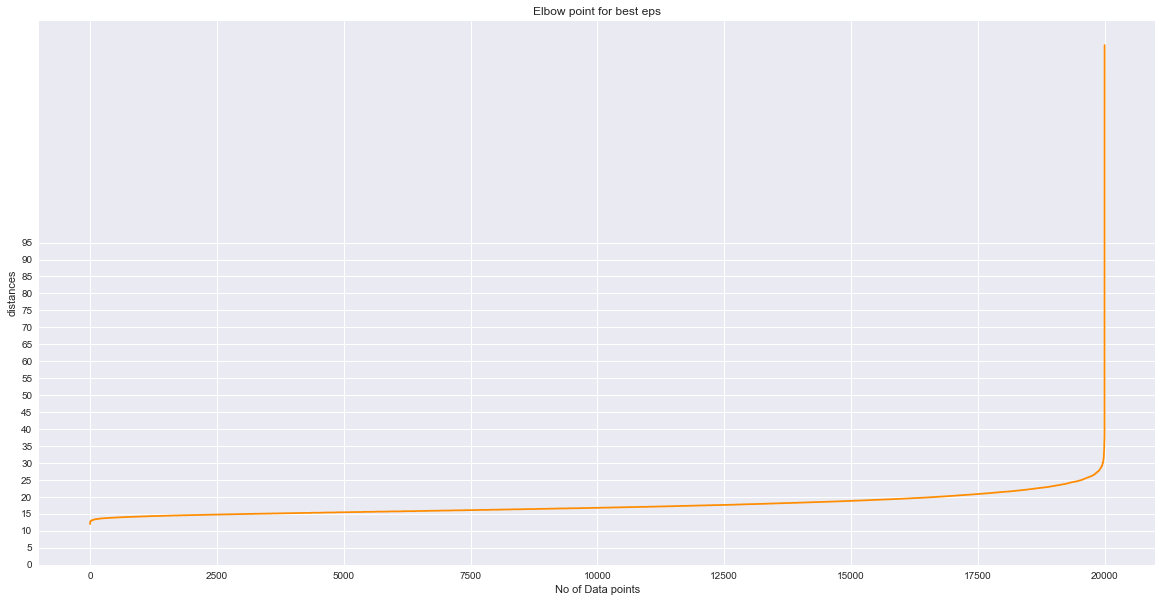

In [384]:

plt.figure(figsize=(20,10))
plt.plot(sorted_epi,color='darkorange')
#plt.legend()
plt.xlabel("No of Data points")
plt.ylabel("distances")
plt.title("Elbow point for best eps")
plt.yticks([x for x in range(0,100,5)])
plt.grid(True)
plt.show()

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [101]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#print(X_tr_bow.shape)
#
#bow_Feature= SelectKBest(chi2,k=50)
#X_tr_bow_50=bow_Feature.fit_transform(X_tr_bow,y)
#
#print("Final Data matrix ")#
#print(X_tr_bow_50.shape, y.shape)

(20000, 14116)
Final Data matrix 
(20000, 50) (20000,)


In [297]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://stackoverflow.com/questions/51514158/how-to-run-gridsearchcv-for-k-means-using-spark-sklearn
from sklearn.cluster import DBSCAN
import numpy as np

dbs=DBSCAN(eps=28, min_samples=100).fit(X_tr_bow_2K)


In [298]:
DBlabels=dbs.labels_

In [353]:
print(DBlabels)
print(np.unique(DBlabels))

[0 0 0 ... 0 0 0]
[-1  0]


In [355]:
X_working = X.copy(deep=True)
X_working["DBLabels"]=DBlabels
X_working.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay', 'price', 'quantity', 'DBLabels'],
      dtype='object')

In [359]:
X_working_noise=X_working[X_working.DBLabels==-1]
X_working_clus0=X_working[X_working.DBLabels==0]

## step 4: Summarize each cluster by manually observing few points from each cluster.

In [388]:
print(X_working_clus0.head(3))
print(X_working_noise.head(3))

   Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0           AZ   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   
2        2016-08-31 12:03:56   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...    

## step 5: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in step 3.

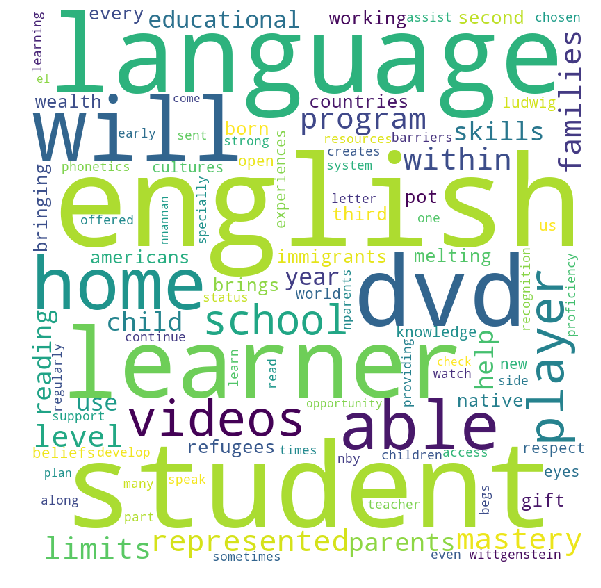

In [360]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in X_working_clus0["essay"][:1]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<h1>3. Conclusions</h1>


- Logistic regression, without splitting the data give AUC of 0.92111529754
- K-Mean algorithm, give best_k as 10
- Run AgglomerativeClustering algorithm on two cluster[2,5], and draw word count on cluster 2.
- DBSCAN algorithm, give best_epi as 28, and draw word count on cluster 0.